# Step 1: import Libraries

In [2]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Loading Dataset

In [3]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Checked of Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Ensure if there is not a NULL
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Step 3: Analysis Statistics

In [6]:
# Analysis statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Step 4: Outlier Checkin

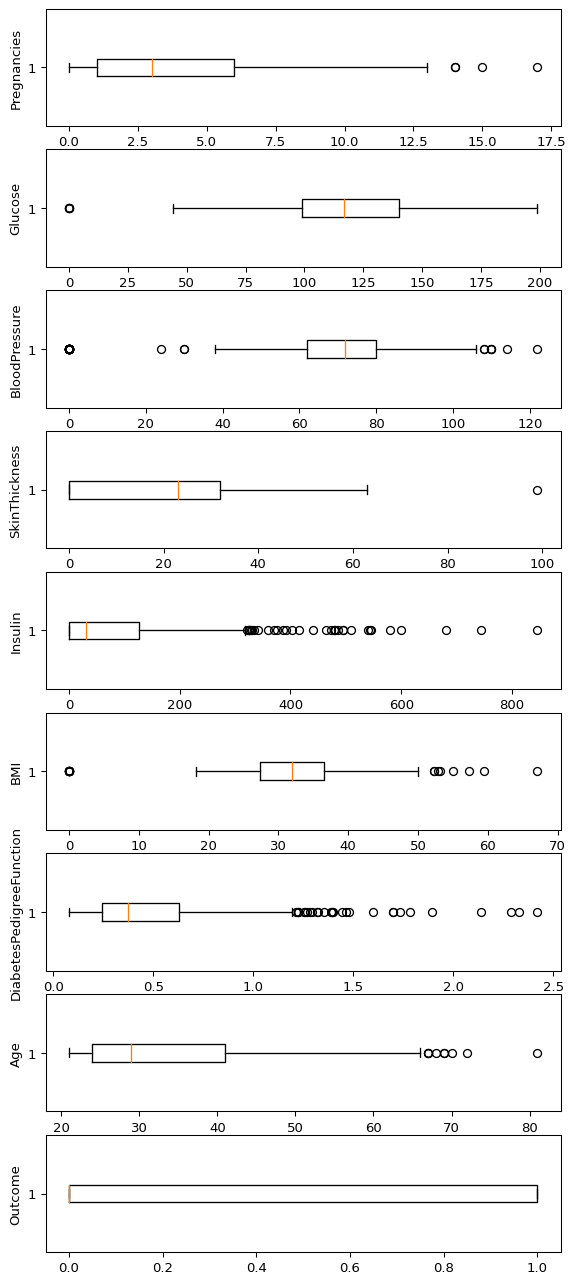

In [7]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [8]:
# Identify the Quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])

# Calculate the interquartile range
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bounds = q1 - (1.5 * iqr)
upper_bounds = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = df[(df['Insulin'] >= lower_bounds)
                & (df['Insulin'] <= upper_bounds)]

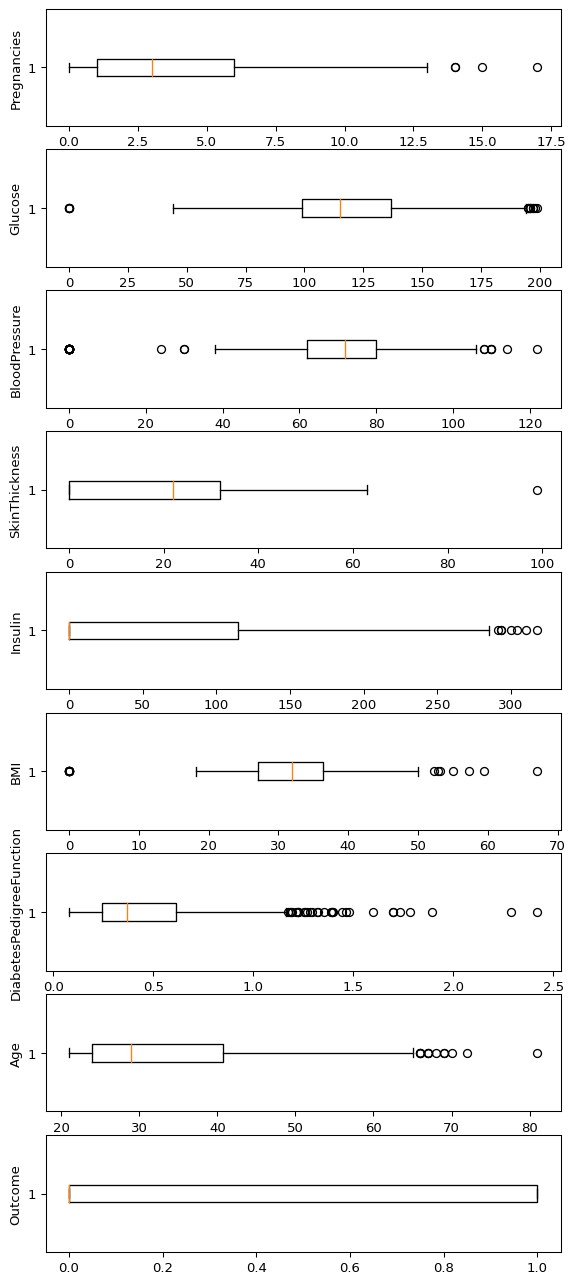

In [9]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in clean_data.columns:
    axs[i].boxplot(clean_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [10]:
# Identify the Quartiles
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])

# Calculate the interquartile range
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bounds = q1 - (1.5 * iqr)
upper_bounds = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bounds)
                & (clean_data['Pregnancies'] <= upper_bounds)]

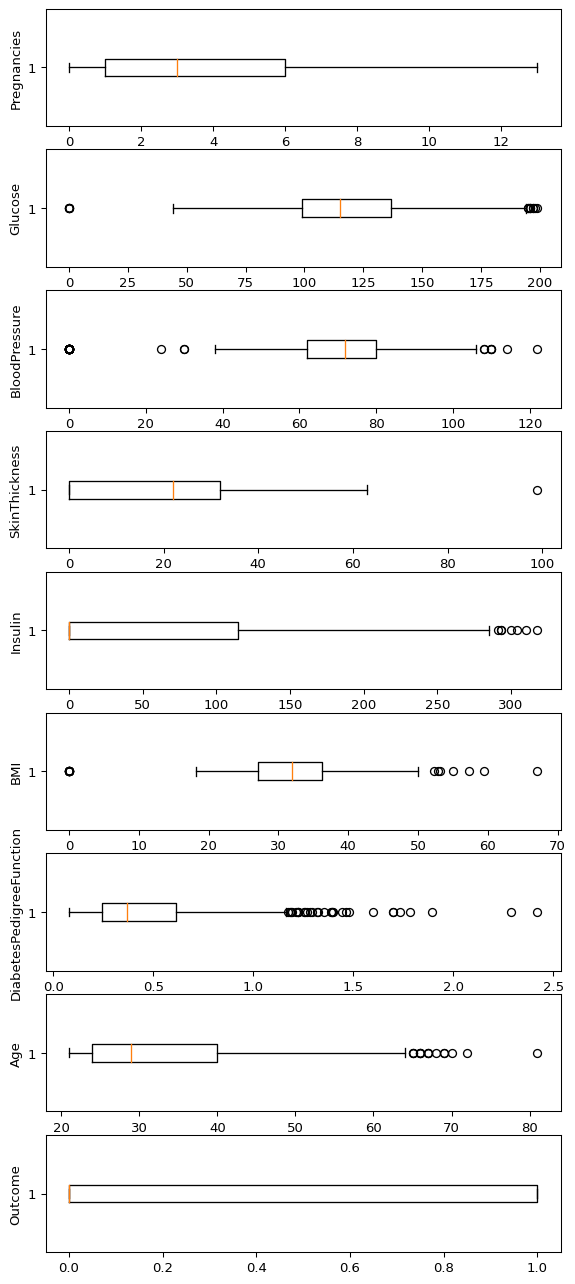

In [11]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in clean_data.columns:
    axs[i].boxplot(clean_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [12]:
# Identify the Quartiles
q1, q3 = np.percentile(clean_data['Age'], [25, 75])

# Calculate the interquartile range
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bounds = q1 - (1.5 * iqr)
upper_bounds = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bounds)
                & (clean_data['Age'] <= upper_bounds)]

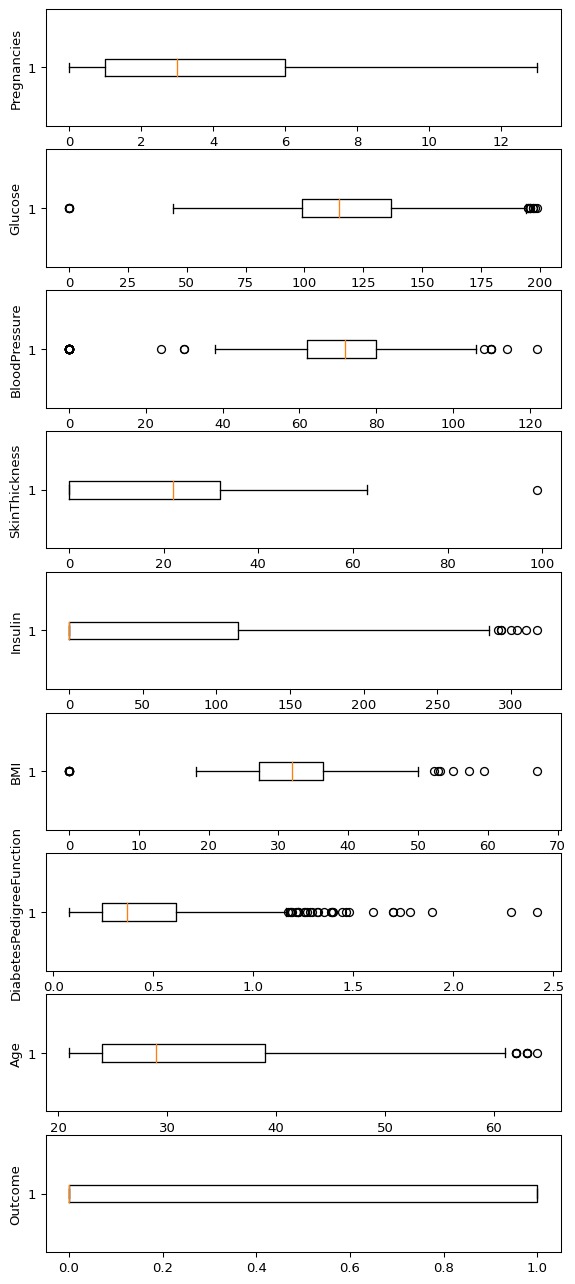

In [13]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in clean_data.columns:
    axs[i].boxplot(clean_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [14]:
# Identify the Quartiles
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])

# Calculate the interquartile range
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bounds = q1 - (1.5 * iqr)
upper_bounds = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bounds)
                & (clean_data['Glucose'] <= upper_bounds)]

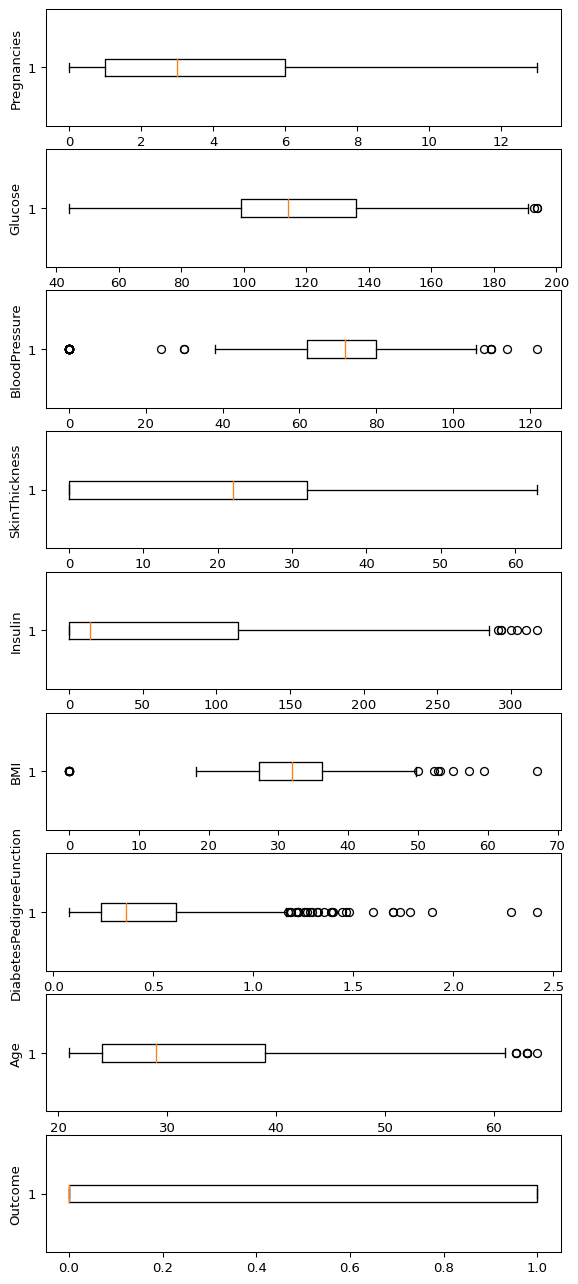

In [15]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in clean_data.columns:
    axs[i].boxplot(clean_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

# Step 5: Correlation

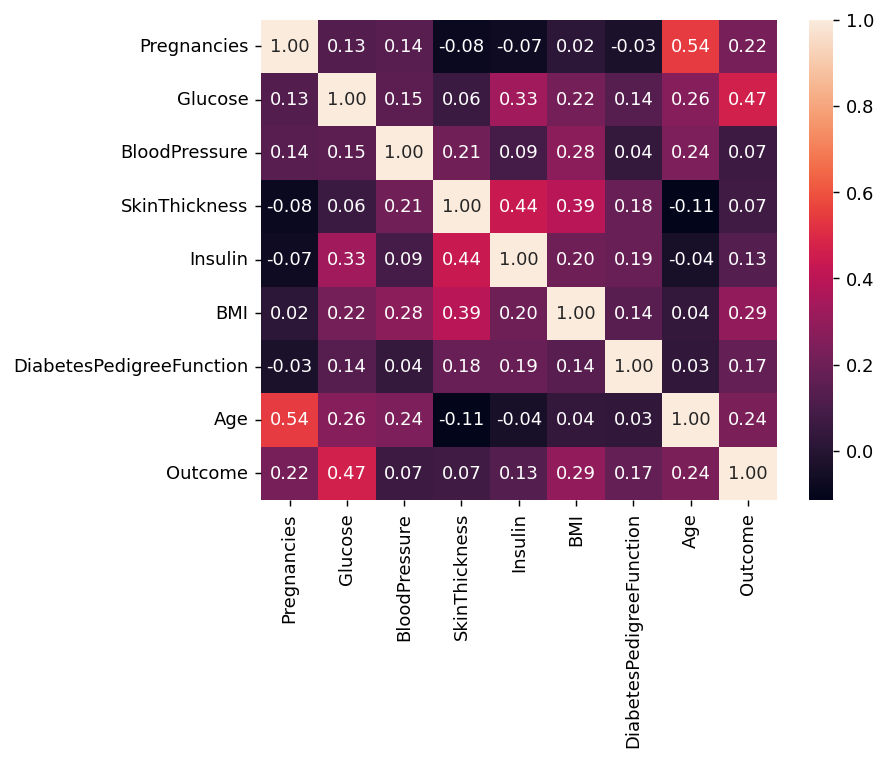

In [16]:
#correlation
corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

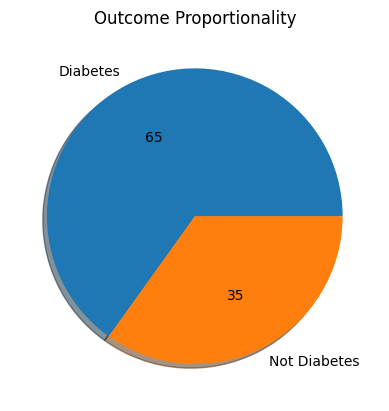

In [17]:
# Plot Grafik
plt.pie(df.Outcome.value_counts(),
labels= ['Diabetes', 'Not Diabetes'],
autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

# Step 6: Penanganan Missing Values

In [18]:
# To Interpolate the missing values
df.interpolate(method = 'linear', limit_direction='forward')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
# Delete Dataline if found min 1 missing values on the fiture
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
# Delete Dataline if data's contains all of missing values
df.dropna(how='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
# Delete missing values if found at least 1 of csv files
# importing pandas module
import pandas as pd

# making dataframe from csv file
data = pd.read_csv("diabetes.csv")

# making new dataframe with dropped NA values
new_data = data.dropna(axis = 0, how ='any')
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
# Dimentions of data before treatment
print("Old data frame length:", len(data))
print("New data frame length:", len(new_data))
print("Number of rows with at least 1 NA value: ", (len(data)-len(new_data)))

Old data frame length: 768
New data frame length: 768
Number of rows with at least 1 NA value:  0
